## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [1]:
import os
import keras

# Disable GPU
#os.environ["CUDA_VISIBLE_DEVICES"] = ""

C:\Users\laogoon\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [7]:
## 超參數設定
"""
Set your hyper-parameters
"""
LEARNING_RATE = 0.0001
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = [0.85, 0.9, 0.95, 0.99]

### nesterov = True

In [9]:
"""
Build the experiment loop
"""
results = {}
for mm in MOMENTUM:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with MOMENTUM = %.2f" % (mm))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=mm)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-momentum-%s" % str(mm)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with MOMENTUM = 0.85
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==========================

50000/50000 [==============================] - 2s 44us/step - loss: 2.2644 - acc: 0.1608 - val_loss: 2.2068 - val_acc: 0.2082
Epoch 2/50
50000/50000 [==============================] - 2s 40us/step - loss: 2.1760 - acc: 0.2265 - val_loss: 2.1442 - val_acc: 0.2491
Epoch 3/50
50000/50000 [==============================] - 2s 40us/step - loss: 2.1211 - acc: 0.2521 - val_loss: 2.0955 - val_acc: 0.2668
Epoch 4/50
50000/50000 [==============================] - 2s 40us/step - loss: 2.0766 - acc: 0.2706 - val_loss: 2.0551 - val_acc: 0.2804
Epoch 5/50
50000/50000 [==============================] - 2s 40us/step - loss: 2.0396 - acc: 0.2820 - val_loss: 2.0218 - val_acc: 0.2944
Epoch 6/50
50000/50000 [==============================] - 2s 40us/step - loss: 2.0093 - acc: 0.2913 - val_loss: 1.9941 - val_acc: 0.3031
Epoch 7/50
50000/50000 [==============================] - 2s 39us/step - loss: 1.9839 - acc: 0.3005 - val_loss: 1.9710 - val_acc: 0.3078
Epoch 8/50
50000/50000 [============================

50000/50000 [==============================] - 2s 40us/step - loss: 2.1285 - acc: 0.2528 - val_loss: 2.0900 - val_acc: 0.2687
Epoch 3/50
50000/50000 [==============================] - 2s 39us/step - loss: 2.0598 - acc: 0.2785 - val_loss: 2.0296 - val_acc: 0.2914
Epoch 4/50
50000/50000 [==============================] - 2s 39us/step - loss: 2.0064 - acc: 0.2983 - val_loss: 1.9827 - val_acc: 0.3058
Epoch 5/50
50000/50000 [==============================] - 2s 38us/step - loss: 1.9637 - acc: 0.3120 - val_loss: 1.9459 - val_acc: 0.3199
Epoch 6/50
50000/50000 [==============================] - 2s 39us/step - loss: 1.9297 - acc: 0.3274 - val_loss: 1.9153 - val_acc: 0.3268
Epoch 7/50
50000/50000 [==============================] - 2s 40us/step - loss: 1.9027 - acc: 0.3352 - val_loss: 1.8929 - val_acc: 0.3354
Epoch 8/50
50000/50000 [==============================] - 2s 39us/step - loss: 1.8814 - acc: 0.3418 - val_loss: 1.8743 - val_acc: 0.3426
Epoch 9/50
50000/50000 [============================

50000/50000 [==============================] - 2s 39us/step - loss: 1.8811 - acc: 0.3365 - val_loss: 1.8387 - val_acc: 0.3528
Epoch 4/50
50000/50000 [==============================] - 2s 38us/step - loss: 1.8123 - acc: 0.3662 - val_loss: 1.7893 - val_acc: 0.3750
Epoch 5/50
50000/50000 [==============================] - 2s 38us/step - loss: 1.7656 - acc: 0.3837 - val_loss: 1.7457 - val_acc: 0.3873
Epoch 6/50
50000/50000 [==============================] - 2s 38us/step - loss: 1.7280 - acc: 0.3987 - val_loss: 1.7113 - val_acc: 0.4051
Epoch 7/50
50000/50000 [==============================] - 2s 38us/step - loss: 1.6993 - acc: 0.4074 - val_loss: 1.6850 - val_acc: 0.4132
Epoch 8/50
50000/50000 [==============================] - 2s 39us/step - loss: 1.6732 - acc: 0.4166 - val_loss: 1.6618 - val_acc: 0.4191
Epoch 9/50
50000/50000 [==============================] - 2s 38us/step - loss: 1.6486 - acc: 0.4248 - val_loss: 1.6394 - val_acc: 0.4276
Epoch 10/50
50000/50000 [===========================

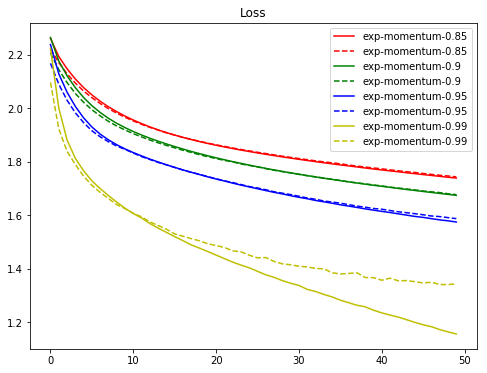

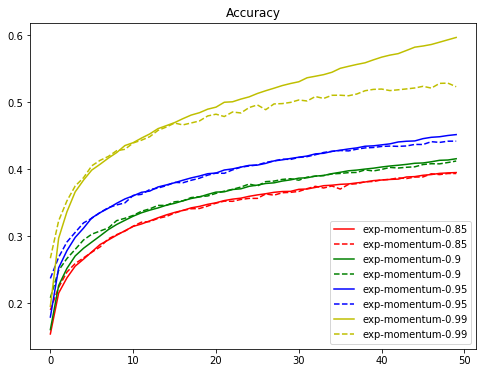

In [10]:
"""
Draw the results
"""
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y"] #, "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

### nesterov = False

In [11]:
"""
Build the experiment loop
"""
results = {}
for mm in MOMENTUM:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with MOMENTUM = %.2f" % (mm))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=False, momentum=mm)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-momentum-%s" % str(mm)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with MOMENTUM = 0.85
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==========================

50000/50000 [==============================] - 2s 42us/step - loss: 2.2729 - acc: 0.1559 - val_loss: 2.2191 - val_acc: 0.2054
Epoch 2/50
50000/50000 [==============================] - 2s 38us/step - loss: 2.1881 - acc: 0.2202 - val_loss: 2.1543 - val_acc: 0.2478
Epoch 3/50
50000/50000 [==============================] - 2s 38us/step - loss: 2.1289 - acc: 0.2583 - val_loss: 2.1010 - val_acc: 0.2738
Epoch 4/50
50000/50000 [==============================] - 2s 38us/step - loss: 2.0810 - acc: 0.2804 - val_loss: 2.0573 - val_acc: 0.2928
Epoch 5/50
50000/50000 [==============================] - 2s 38us/step - loss: 2.0410 - acc: 0.2978 - val_loss: 2.0207 - val_acc: 0.2994
Epoch 6/50
50000/50000 [==============================] - 2s 38us/step - loss: 2.0071 - acc: 0.3077 - val_loss: 1.9901 - val_acc: 0.3142
Epoch 7/50
50000/50000 [==============================] - 2s 38us/step - loss: 1.9789 - acc: 0.3171 - val_loss: 1.9643 - val_acc: 0.3163
Epoch 8/50
50000/50000 [============================

50000/50000 [==============================] - 2s 38us/step - loss: 2.1406 - acc: 0.2437 - val_loss: 2.0953 - val_acc: 0.2715
Epoch 3/50
50000/50000 [==============================] - 2s 37us/step - loss: 2.0570 - acc: 0.2844 - val_loss: 2.0233 - val_acc: 0.3006
Epoch 4/50
50000/50000 [==============================] - 2s 36us/step - loss: 1.9948 - acc: 0.3068 - val_loss: 1.9721 - val_acc: 0.3054
Epoch 5/50
50000/50000 [==============================] - 2s 37us/step - loss: 1.9516 - acc: 0.3228 - val_loss: 1.9349 - val_acc: 0.3300
Epoch 6/50
50000/50000 [==============================] - 2s 37us/step - loss: 1.9189 - acc: 0.3333 - val_loss: 1.9070 - val_acc: 0.3394
Epoch 7/50
50000/50000 [==============================] - 2s 38us/step - loss: 1.8930 - acc: 0.3420 - val_loss: 1.8868 - val_acc: 0.3388
Epoch 8/50
50000/50000 [==============================] - 2s 37us/step - loss: 1.8724 - acc: 0.3474 - val_loss: 1.8656 - val_acc: 0.3524
Epoch 9/50
50000/50000 [============================

50000/50000 [==============================] - 2s 37us/step - loss: 1.8914 - acc: 0.3339 - val_loss: 1.8577 - val_acc: 0.3501
Epoch 4/50
50000/50000 [==============================] - 2s 37us/step - loss: 1.8328 - acc: 0.3554 - val_loss: 1.8080 - val_acc: 0.3670
Epoch 5/50
50000/50000 [==============================] - 2s 37us/step - loss: 1.7846 - acc: 0.3738 - val_loss: 1.7635 - val_acc: 0.3875
Epoch 6/50
50000/50000 [==============================] - 2s 36us/step - loss: 1.7436 - acc: 0.3911 - val_loss: 1.7291 - val_acc: 0.3906
Epoch 7/50
50000/50000 [==============================] - 2s 37us/step - loss: 1.7105 - acc: 0.3983 - val_loss: 1.6974 - val_acc: 0.3989
Epoch 8/50
50000/50000 [==============================] - 2s 37us/step - loss: 1.6795 - acc: 0.4126 - val_loss: 1.6673 - val_acc: 0.4164
Epoch 9/50
50000/50000 [==============================] - 2s 37us/step - loss: 1.6518 - acc: 0.4216 - val_loss: 1.6519 - val_acc: 0.4146
Epoch 10/50
50000/50000 [===========================

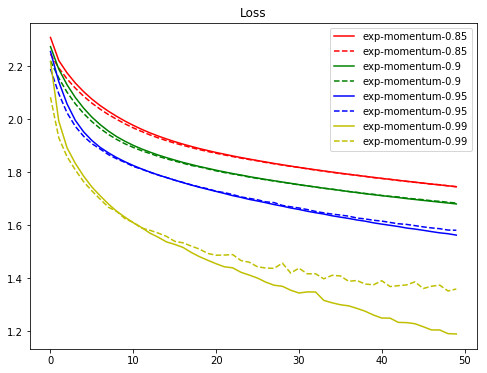

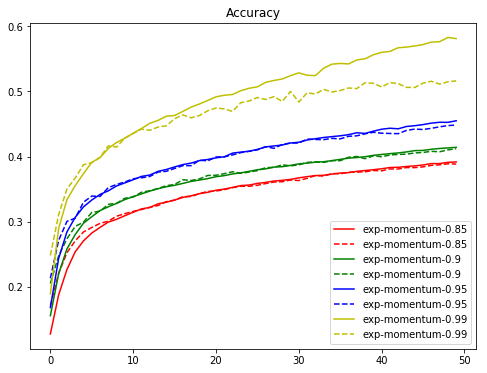

In [12]:
"""
Draw the results
"""
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y"] #, "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()